In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import keras

In [4]:
from keras.utils import to_categorical

In [5]:
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)

In [6]:
from tensorflow.keras.layers import LeakyReLU

In [7]:
dirname = os.path.join(os.getcwd(), 'train')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\jksl5\Desktop\Clasificador carne\train\
C:\Users\jksl5\Desktop\Clasificador carne\train\CLASS_02 1
C:\Users\jksl5\Desktop\Clasificador carne\train\CLASS_03 62
C:\Users\jksl5\Desktop\Clasificador carne\train\CLASS_04 213
C:\Users\jksl5\Desktop\Clasificador carne\train\CLASS_05 105
C:\Users\jksl5\Desktop\Clasificador carne\train\CLASS_06 949
C:\Users\jksl5\Desktop\Clasificador carne\train\CLASS_07 37
C:\Users\jksl5\Desktop\Clasificador carne\train\CLASS_08 204
Directorios leidos: 7
Imagenes en cada directorio [63, 213, 105, 949, 37, 204, 62]
suma Total de imagenes en subdirs: 1633


In [8]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
carnes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    carnes.append(name[len(name)-1])
    indice=indice+1
 
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #para crear la lista a numpy
 
# Los número de las etiquetas
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  1633
0 CLASS_02
1 CLASS_03
2 CLASS_04
3 CLASS_05
4 CLASS_06
5 CLASS_07
6 CLASS_08
Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


In [9]:
#Permutación aleatoria entre datos de validación y de test
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.1)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (1469, 216, 384, 3) (1469,)
Testing data shape :  (164, 216, 384, 3) (164,)


Text(0.5, 1.0, 'Ground Truth : 6')

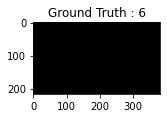

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.
 
# Cambiar las etiquetas de categorical a one hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

plt.figure(figsize=[5,5])

# Mostrar la primera imagen del entrenamiento en grises
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

In [11]:
#Mostrar el cambio
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
 
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.1, random_state=13)
 
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Original label: 6
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1.]
(1322, 216, 384, 3) (147, 216, 384, 3) (1322, 7) (147, 7)


In [12]:
INIT_LR = 1e-3
epochs = 20
batch_size = 32

In [13]:
from keras.models import Sequential

In [14]:
from keras.layers import Convolution2D

In [15]:
carnes_model = Sequential()
carnes_model.add(Convolution2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(216,384,3)))
carnes_model.add(LeakyReLU(alpha=0.1))

In [16]:
carnes_model.add(Flatten())
carnes_model.add(Dense(32, activation='linear'))
carnes_model.add(LeakyReLU(alpha=0.1))
carnes_model.add(Dropout(0.5)) 
carnes_model.add(Dense(nClasses, activation='softmax'))

In [17]:
carnes_model.summary()
 
carnes_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 216, 384, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 216, 384, 32)      0         
                                                                 
 flatten (Flatten)           (None, 2654208)           0         
                                                                 
 dense (Dense)               (None, 32)                84934688  
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 2

In [18]:
carnes_train_dropout = carnes_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
 
# guardamos la red para usarla en un futuro, sin la necesidad de volver a entrenar la red.
carnes_model.save("carnes_mnist.h5py")

Epoch 1/20
42/42 [==============================] - 30s 661ms/step - loss: 1.6526 - accuracy: 0.5703 - val_loss: 1.4514 - val_accuracy: 0.5510
Epoch 2/20
42/42 [==============================] - 28s 665ms/step - loss: 1.4315 - accuracy: 0.5794 - val_loss: 1.4555 - val_accuracy: 0.5510
Epoch 3/20
42/42 [==============================] - 27s 653ms/step - loss: 1.4464 - accuracy: 0.5787 - val_loss: 1.4480 - val_accuracy: 0.5510
Epoch 4/20
42/42 [==============================] - 28s 674ms/step - loss: 1.4302 - accuracy: 0.5749 - val_loss: 1.4524 - val_accuracy: 0.5510
Epoch 5/20
42/42 [==============================] - 28s 661ms/step - loss: 1.4330 - accuracy: 0.5802 - val_loss: 1.4525 - val_accuracy: 0.5510
Epoch 6/20
42/42 [==============================] - 29s 680ms/step - loss: 1.4177 - accuracy: 0.5787 - val_loss: 1.4691 - val_accuracy: 0.5510
Epoch 7/20
42/42 [==============================] - 29s 685ms/step - loss: 1.4283 - accuracy: 0.5847 - val_loss: 1.4460 - val_accuracy: 0.5510

INFO:tensorflow:Assets written to: carnes_mnist.h5py\assets


INFO:tensorflow:Assets written to: carnes_mnist.h5py\assets


In [19]:
test_eval = carnes_model.evaluate(test_X, test_Y_one_hot, verbose=1)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

6/6 [==============================] - 4s 156ms/step - loss: 1.4466 - accuracy: 0.5488
Test loss: 1.4466384649276733
Test accuracy: 0.5487805008888245
